In [1]:
from keras.datasets import reuters
import numpy as np

In [2]:
WORD_COUNT = 10000
(x_train, y_train), (x_test,y_test) = reuters.load_data(num_words=WORD_COUNT)

In [3]:
x_train.shape

(8982,)

In [4]:
categories = set(list(y_train))

In [5]:
CATEGORY_COUNT = categories.__len__()
CATEGORY_COUNT

46

In [6]:
categories

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45}

In [7]:
list(map(lambda news: len(news), x_train))

[87,
 56,
 139,
 224,
 101,
 116,
 100,
 100,
 82,
 106,
 31,
 59,
 65,
 316,
 527,
 76,
 114,
 17,
 91,
 77,
 231,
 108,
 83,
 29,
 95,
 110,
 23,
 373,
 114,
 354,
 133,
 222,
 571,
 155,
 83,
 208,
 170,
 269,
 74,
 19,
 23,
 78,
 21,
 377,
 104,
 299,
 89,
 56,
 94,
 139,
 118,
 36,
 137,
 107,
 83,
 66,
 70,
 112,
 88,
 51,
 83,
 123,
 17,
 185,
 84,
 52,
 102,
 73,
 106,
 486,
 107,
 82,
 263,
 172,
 491,
 190,
 143,
 62,
 26,
 88,
 114,
 38,
 85,
 112,
 793,
 104,
 25,
 21,
 101,
 28,
 25,
 81,
 135,
 73,
 62,
 18,
 90,
 266,
 91,
 64,
 409,
 92,
 319,
 166,
 85,
 200,
 152,
 474,
 60,
 58,
 584,
 71,
 273,
 51,
 255,
 28,
 171,
 143,
 91,
 46,
 110,
 77,
 162,
 24,
 52,
 175,
 61,
 95,
 97,
 259,
 112,
 73,
 94,
 17,
 650,
 23,
 88,
 309,
 105,
 89,
 41,
 314,
 54,
 374,
 67,
 160,
 75,
 207,
 373,
 84,
 87,
 74,
 98,
 136,
 256,
 95,
 50,
 108,
 52,
 100,
 233,
 86,
 68,
 47,
 73,
 158,
 113,
 23,
 100,
 80,
 202,
 104,
 122,
 101,
 95,
 118,
 253,
 192,
 80,
 183,
 29,
 604,


In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

In [9]:
len(word_index.keys())

30979

In [10]:
decoded_review = " ".join(reverse_word_index.get(i, "?") for i in x_train[0])
decoded_review

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [11]:
def vectorize_sample(sample, size=WORD_COUNT):
    vector = np.zeros(size)
    for word in sample:
        vector[word] = 1
    return vector
    

In [12]:
def transform_data(data, y_axis):
    array = np.ndarray((len(data),y_axis), dtype=np.float32)
    for i in range(len(array)):
        array[i] = vectorize_sample(data[i])
    return array

In [13]:
x_train = transform_data(x_train, WORD_COUNT)
x_test = transform_data(x_test, WORD_COUNT)

In [14]:
x_train.shape

(8982, 10000)

In [15]:
x_test.shape

(2246, 10000)

In [16]:
def encode_one_hot(labels, dimension=CATEGORY_COUNT):
    encoded = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        encoded[i][label] = 1
    return encoded

In [17]:
y_train = encode_one_hot(y_train)
y_test = encode_one_hot(y_test)

In [18]:
#BUILT-IN WAY FOR ONE HOT ENCODING
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(y_train)

In [19]:
from keras import models
from keras import layers

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(WORD_COUNT,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [21]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
x_validation = x_train[:1000]
partial_x_train = x_train[1000:]

y_validation = y_train[:1000]
partial_y_train = y_train[1000:]

In [23]:
EPOCHS = 20
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=EPOCHS,
    batch_size=512,
    validation_data=(x_validation, y_validation)
)

Epoch 1/20
16/16 [==============================] - 2s 29ms/step - loss: 2.5041 - accuracy: 0.5163 - val_loss: 1.6695 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3757 - accuracy: 0.7142 - val_loss: 1.2931 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0324 - accuracy: 0.7829 - val_loss: 1.1206 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8104 - accuracy: 0.8281 - val_loss: 1.0400 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6441 - accuracy: 0.8612 - val_loss: 0.9821 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5105 - accuracy: 0.8915 - val_loss: 0.9301 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4111 - accuracy: 0.9129 - val_loss: 0.9194 - val_accuracy: 0.8050
Epoch 8/20
16

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
hist_dict = history.history
hist_dict["loss"]

[2.5040948390960693,
 1.3757283687591553,
 1.0323818922042847,
 0.810396134853363,
 0.6441153883934021,
 0.5105053782463074,
 0.4111176133155823,
 0.3358677327632904,
 0.2762765884399414,
 0.23617777228355408,
 0.20115558803081512,
 0.17730183899402618,
 0.1604890078306198,
 0.1467556655406952,
 0.13799336552619934,
 0.1302061676979065,
 0.12394952774047852,
 0.1210210770368576,
 0.11344683915376663,
 0.10976917296648026]

In [26]:
epochs_range = range(1, EPOCHS + 1)

In [27]:
import matplotlib.pyplot as plt

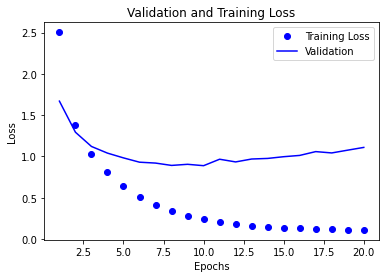

In [28]:
plt.plot(epochs_range, hist_dict["loss"], "bo", label="Training Loss")
plt.plot(epochs_range, hist_dict["val_loss"], "b", label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation and Training Loss")
plt.legend()
plt.show()

After 8 epochh, validation loss does not drop which means around ~8 is a good epoch size

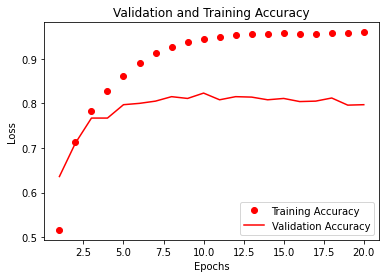

In [29]:
plt.clf()

plt.plot(epochs_range, hist_dict["accuracy"], "ro", label="Training Accuracy")
plt.plot(epochs_range, hist_dict["val_accuracy"], "r", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation and Training Accuracy")
plt.legend()
plt.show()

Same pattern with the loss can be seen in this plot as well

In [30]:
result = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2399 - accuracy: 0.7818


In [31]:
result

[1.239903211593628, 0.7818343639373779]

In [75]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu",input_shape=(WORD_COUNT,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(CATEGORY_COUNT, activation="softmax"))

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [76]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=7,
    batch_size=512,
    validation_data=(x_validation, y_validation)
)

Epoch 1/7
16/16 [==============================] - 1s 23ms/step - loss: 2.7123 - accuracy: 0.4970 - val_loss: 1.8075 - val_accuracy: 0.6360
Epoch 2/7
16/16 [==============================] - 0s 15ms/step - loss: 1.4623 - accuracy: 0.7005 - val_loss: 1.3142 - val_accuracy: 0.7140
Epoch 3/7
16/16 [==============================] - 0s 15ms/step - loss: 1.0682 - accuracy: 0.7793 - val_loss: 1.1547 - val_accuracy: 0.7510
Epoch 4/7
16/16 [==============================] - 0s 14ms/step - loss: 0.8484 - accuracy: 0.8218 - val_loss: 1.0544 - val_accuracy: 0.7670
Epoch 5/7
16/16 [==============================] - 0s 14ms/step - loss: 0.6776 - accuracy: 0.8577 - val_loss: 0.9908 - val_accuracy: 0.8010
Epoch 6/7
16/16 [==============================] - 0s 14ms/step - loss: 0.5509 - accuracy: 0.8855 - val_loss: 0.9421 - val_accuracy: 0.8080
Epoch 7/7
16/16 [==============================] - 0s 13ms/step - loss: 0.4466 - accuracy: 0.9102 - val_loss: 0.9133 - val_accuracy: 0.8170


In [77]:
result = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9877 - accuracy: 0.7836


In [78]:
result

[0.987718939781189, 0.7836152911186218]

In [36]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [38]:
predictions.shape

(2246, 46)

In [46]:
predictions[25].sum()

1.0000001